In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
random.seed(0)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load Dataset

In [2]:
df = pd.read_csv('flight.csv')
df

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62983,18375,5/20/2011,6/5/2013,Female,4,guangzhou,guangdong,CN,25.0,3/31/2014,...,0.0,1134,6/9/2013,297,4.000000,4,1,0.000000,12318,22
62984,36041,3/8/2010,9/14/2013,Male,4,foshan,guangdong,CN,38.0,3/31/2014,...,0.0,8016,1/3/2014,89,37.000000,60,14,0.000000,106972,43
62985,45690,3/30/2006,12/2/2006,Female,4,guangzhou,guangdong,CN,43.0,3/31/2014,...,0.0,2594,3/3/2014,29,166.000000,166,0,0.000000,0,0
62986,61027,2/6/2013,2/14/2013,Female,4,guangzhou,guangdong,CN,36.0,3/31/2014,...,0.0,3934,2/26/2013,400,12.000000,12,0,0.000000,0,0


# Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

Change to appropriate datatypes

FFP_DATE, FIRST_FLIGHT_DATE, LOAD_TIME, LAST_FLIGHT_DATE should be of DateTime data type.
Age should be of Integer data type."

In [4]:
# Changing the data types with error handling
df['FFP_DATE'] = pd.to_datetime(df['FFP_DATE'], errors='coerce')
df['FIRST_FLIGHT_DATE'] = pd.to_datetime(df['FIRST_FLIGHT_DATE'], errors='coerce')
df['LOAD_TIME'] = pd.to_datetime(df['LOAD_TIME'], errors='coerce')
df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'], errors='coerce')
df['AGE'] = df['AGE'].astype('Int64')  # Using 'Int64' to handle NaN values properly

## Check Missing Values 

In [5]:
#Calculate the total number of missing values in each column 
nullvalues_count = df.isna().sum().sort_values(ascending = False)
nullvalues_percent = round(df.isna().mean()*100,2).sort_values(ascending = False)

missing_values = pd.concat([nullvalues_count, nullvalues_percent], axis = 1, keys=["nullvalues_count","nullvalues_Percent (%)"])
missing_values

,nullvalues_count,nullvalues_Percent (%)
WORK_PROVINCE,3248,5.16
WORK_CITY,2269,3.60
SUM_YR_1,551,0.87
LAST_FLIGHT_DATE,421,0.67
AGE,420,0.67
SUM_YR_2,138,0.22
WORK_COUNTRY,26,0.04
GENDER,3,0.00
MEMBER_NO,0,0.00
Points_Sum,0,0.00


In [6]:
# Calculate the total number of missing values in dataset

total_missingvalues= df.shape[0] - df.dropna().shape[0]
missingvalues_percent = round((df.shape[0] - df.dropna().shape[0])/df.shape[0]*100,2)
print("Total Missing Values count :", total_missingvalues)
print("Percentage of Missing Values :",missingvalues_percent,"%")

Total Missing Values count : 5128
Percentage of Missing Values : 8.14 %


## Check Duplicate 

In [7]:
df.duplicated().sum()

0

**Observation Results**

1. The dataset has 62,988 rows and 23 columns.
2. There are 5128 missing values in the dataset, which is about 8.14%.
3. The dataset does not contain any duplicate data.

# Exploratory Data Analyst

## Grouping Data Based on Data Type

In [8]:
#Grouping Categorical Features and Numerical Features
cats = df.select_dtypes(include="object").columns.tolist()
nums = df.select_dtypes(exclude="object").columns.tolist()
print("Categorical Features:", cats)
print("Number of Categorical Features:", len(cats), "\n")
print("Numerical Features:", nums)
print("Number of Numerical Features:", len(nums), "\n")

Categorical Features: ['GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY']
Number of Categorical Features: 4 

Numerical Features: ['MEMBER_NO', 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'FFP_TIER', 'AGE', 'LOAD_TIME', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_FLIGHT_DATE', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight']
Number of Numerical Features: 19 



## Descriptive Statistic

In [9]:
#summary statistics for numerical columns  
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,62988.0,31494.5,18183.213715,1.0,15747.75,31494.5,47241.25,62988.0
FFP_TIER,62988.0,4.102162,0.373856,4.0,4.0,4.0,4.0,6.0
AGE,62568.0,42.476346,9.885915,6.0,35.0,41.0,48.0,110.0
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.0,3.0,7.0,15.0,213.0
BP_SUM,62988.0,10925.081254,16339.486151,0.0,2518.0,5700.0,12831.0,505308.0
SUM_YR_1,62437.0,5355.376064,8109.450147,0.0,1003.0,2800.0,6574.0,239560.0
SUM_YR_2,62850.0,5604.026014,8703.364247,0.0,780.0,2773.0,6845.75,234188.0
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.0,4747.0,9994.0,21271.25,580717.0
LAST_TO_END,62988.0,176.120102,183.822223,1.0,29.0,108.0,268.0,731.0
AVG_INTERVAL,62988.0,67.749788,77.517866,0.0,23.37037,44.666667,82.0,728.0


**Observation**
Most features have a Mean > Median, indicating that the features tend to be positively skewed.
For the features MEMBER_NO, FFP_TIER, avg_discount, having almost the same Mean and Median indicates that the features tend to be normally distributed.
There are zero values in the features BP_SUM, SUM_YR_1, SUM_YR_2, AVG_INTERVAL, MAX_INTERVAL, EXCHANGE_COUNT, avg_discount, Points_Sum, Point_NotFlight."

In [10]:
#Summary statistics for categorical columns 
df[cats].describe().T

,count,unique,top,freq
GENDER,62985,2,Male,48134
WORK_CITY,60719,3234,guangzhou,9386
WORK_PROVINCE,59740,1165,guangdong,17509
WORK_COUNTRY,62962,118,CN,57748


In [11]:
gender_percent = round(48134/62985 *100, 2)
workcity_percent = round(9386/60719 *100, 2)
workprovince_percent = round(17509/59740 *100, 2)
workcountry_percent = round(57748/62962 *100, 2)

print("Percentage of Males:", gender_percent, "%")
print("Percentage of Work City:", workcity_percent, "%")
print("Percentage of Work Province:", workprovince_percent, "%")
print("Percentage of Work Country:", workcountry_percent, "%")

Percentage of Males: 76.42 %
Percentage of Work City: 15.46 %
Percentage of Work Province: 29.31 %
Percentage of Work Country: 91.72 %


In [12]:
# Viewing the number of values in Categorical Features
for col in cats:
  print(f"Values in {col} are")
  print(df[col].value_counts(), "\n")
  print("==========================================")

Values in GENDER are
Male      48134
Female    14851
Name: GENDER, dtype: int64 

Values in WORK_CITY are
guangzhou    9386
beijing      7845
shanghai     5001
shenzhen     3605
dalian       1979
             ... 
KASUGAI         1
hainan          1
xinxishi        1
KA              1
lingshui        1
Name: WORK_CITY, Length: 3234, dtype: int64 

Values in WORK_PROVINCE are
guangdong        17509
beijing           8014
shanghai          4998
liaoning          4182
xinjiang          2512
                 ...  
YAMAGUCHI-KEN        1
AICHIKEN             1
SOUTU HOLLAND        1
xinxixian            1
JAWATIMUR            1
Name: WORK_PROVINCE, Length: 1165, dtype: int64 

Values in WORK_COUNTRY are
CN    57748
HK      991
JP      875
KR      790
US      575
      ...  
CD        1
BI        1
CM        1
FL        1
GL        1
Name: WORK_COUNTRY, Length: 118, dtype: int64 



**Observation**
1. The majority of airline users are male, accounting for 76.42%.
2. The majority of airline users are from the city of Guangzhou, accounting for 15.46%.
3. The majority of airline users are from Guangdong Province, accounting for 29.31%.
4. The majority of airline users come from the country code CN, accounting for 91.72%.

## Univariate Analysis

### Numerical Data 

View the boxplot of numerical data to see the data distribution and outliers

Skipping non-numeric column: FFP_DATE
Skipping non-numeric column: FIRST_FLIGHT_DATE
Skipping non-numeric column: LOAD_TIME
Skipping non-numeric column: LAST_FLIGHT_DATE


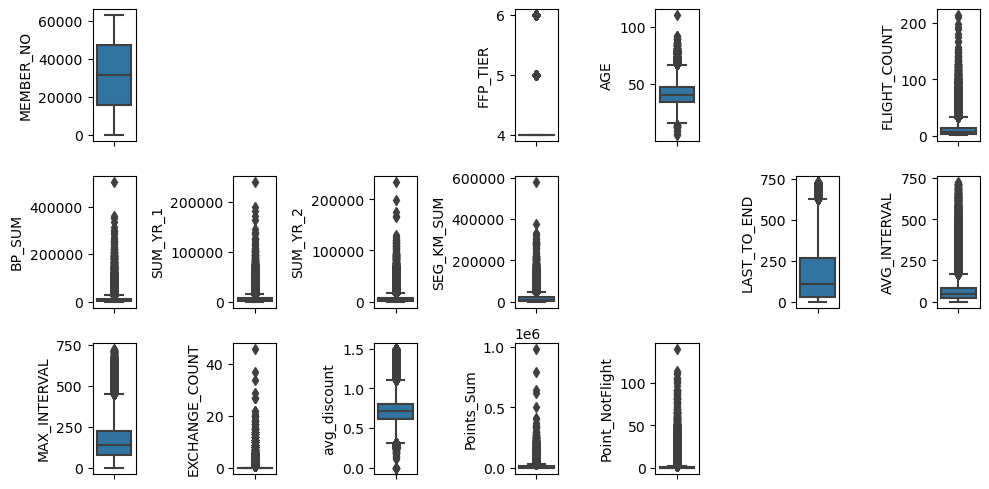

In [13]:
# Check the data types of columns in nums
#print(df[nums].dtypes)
# Adjusting the plotting code
plt.figure(figsize=(10,5))
for i in range(len(nums)):
    # Check if the column is numeric before plotting
    if pd.api.types.is_numeric_dtype(df[nums[i]]):
        plt.subplot(3, len(nums)//3 + len(nums)%3, i+1)
        sns.boxplot(y=df[nums[i]])
    else:
        print(f"Skipping non-numeric column: {nums[i]}")
plt.tight_layout()
plt.show()

### Categorical Data

View the comparison of the quantity of Categorical data using boxplot

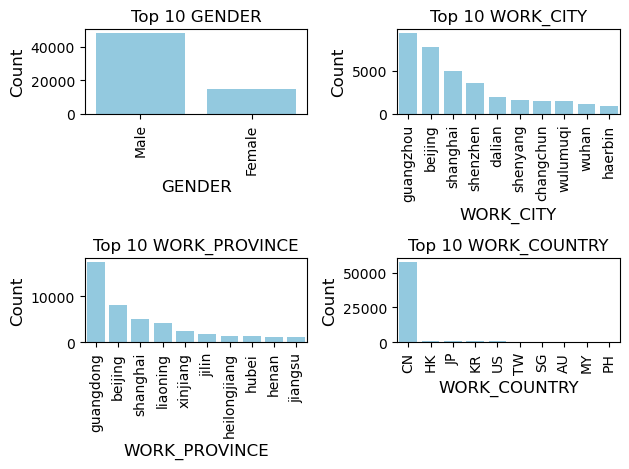

In [14]:
top_n = 10  # for example, show only the top 10 categories
for i in range(len(cats)):
    plt.subplot(2, 2, i+1)
    data_to_plot = df[cats[i]].value_counts().head(top_n)  # Only take the top N values
    ax = sns.barplot(x=data_to_plot.index, y=data_to_plot, color="skyblue")
    ax.set_title(f'Top {top_n} {cats[i]}')
    plt.xticks(rotation=90)
    plt.xlabel(cats[i], fontsize=12)
    plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

#### Visualization of WORK_CITY, WORK_PROVINCE, WORK_COUNTRY

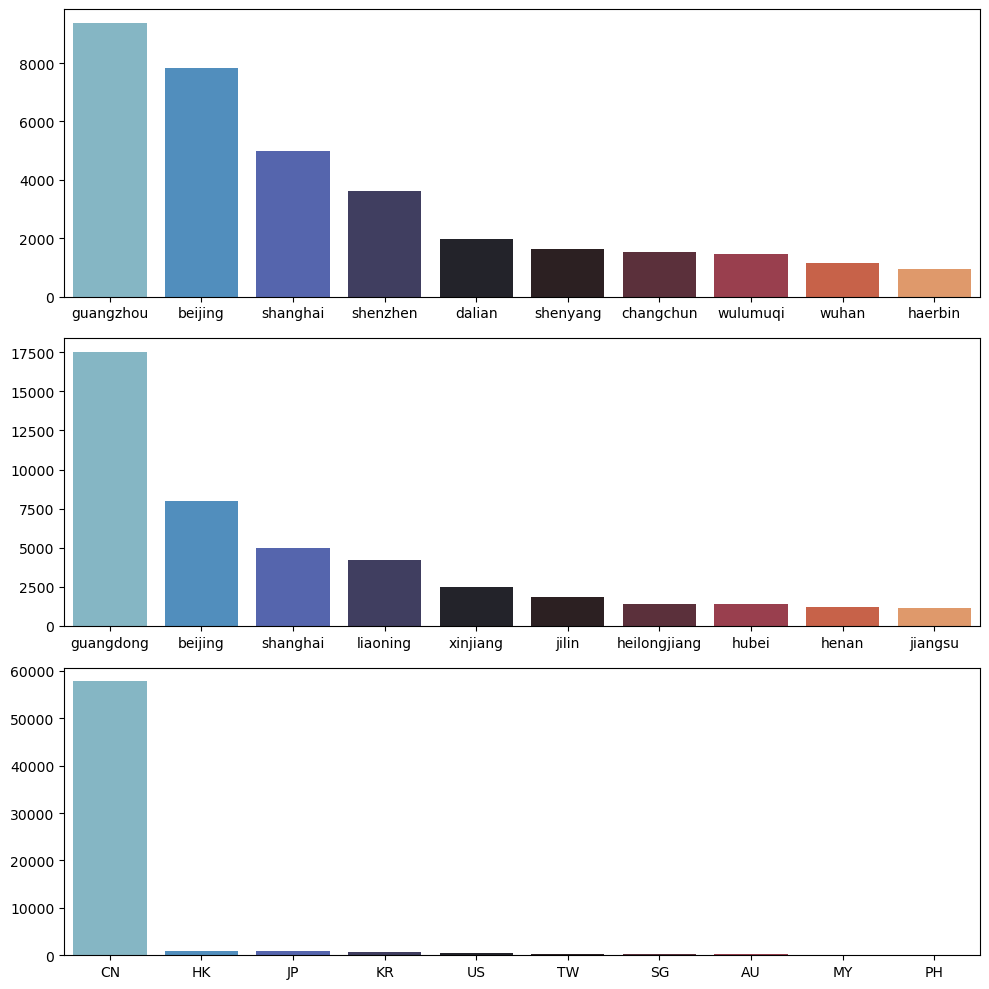

In [15]:
airline_workcity_top10 = df["WORK_CITY"].value_counts().head(10)
airline_workprovince_top10 = df["WORK_PROVINCE"].value_counts().head(10)
airline_workcountry_top10 = df["WORK_COUNTRY"].value_counts().head(10)
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,10))
sns.barplot(x=airline_workcity_top10.index, y=airline_workcity_top10.values, ax=ax[0], palette="icefire")
sns.barplot(x=airline_workprovince_top10.index, y=airline_workprovince_top10.values, ax=ax[1], palette="icefire")
sns.barplot(x=airline_workcountry_top10.index, y=airline_workcountry_top10.values, ax=ax[2], palette="icefire")
plt.tight_layout()
plt.show()

#### Visualization of FFP_DATE, FIRST_FLIGHT_DATE, LAST_FLIGHT_DATE

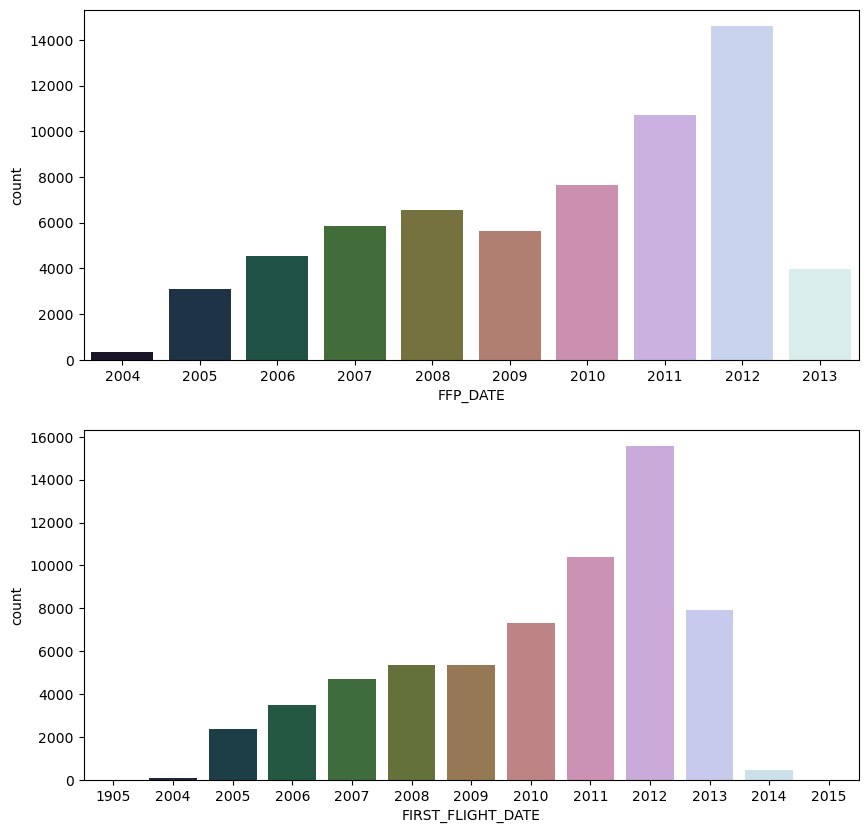

In [16]:
airline_ffp_date = pd.to_datetime(df["FFP_DATE"]).dt.year
airline_firstflight_date = pd.to_datetime(df["FIRST_FLIGHT_DATE"]).dt.year
airline_lastflight_date = pd.to_datetime(df["LAST_FLIGHT_DATE"]).dt.year
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
sns.countplot(x=airline_ffp_date, ax=ax[0], palette="cubehelix")
sns.countplot(x=airline_firstflight_date, ax=ax[1], palette="cubehelix")
plt.show()


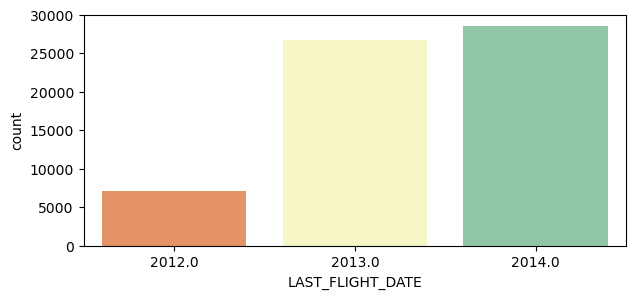

In [18]:
df_lastflight_date = pd.to_datetime(df["LAST_FLIGHT_DATE"]).dt.year

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,3))
ax = sns.countplot(x=df_lastflight_date, palette="Spectral")
plt.show()

### Multivariate Analysis

Viewing the correlation between Features using a Heatmap

C:\Users\jeanb\AppData\Local\Temp\ipykernel_3580\4221621576.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f")


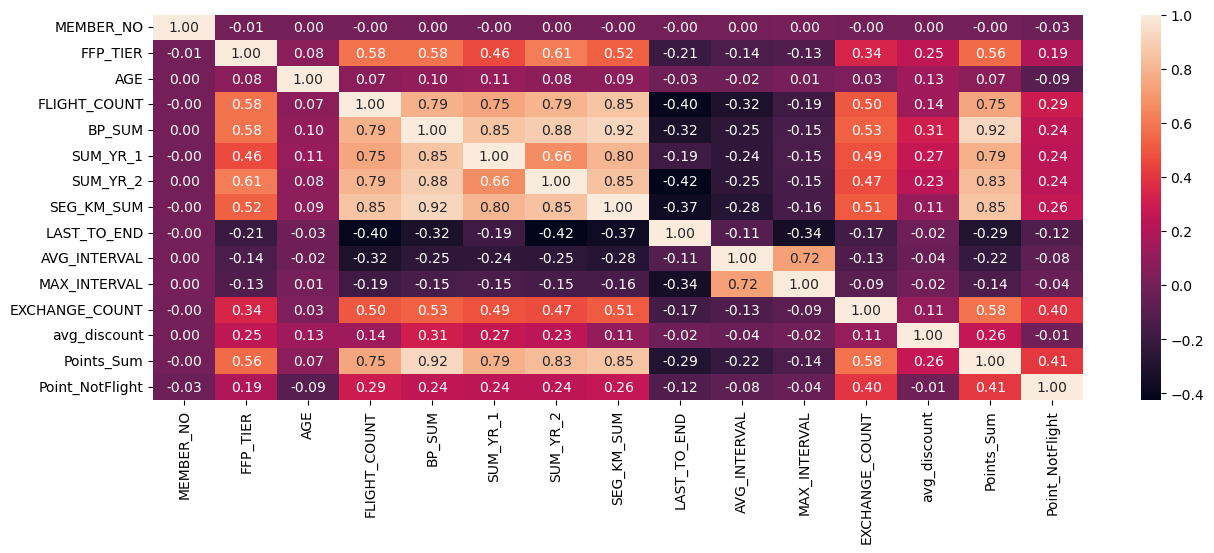

In [19]:
plt.figure(figsize=(15,5))

sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

**Observation**

There are features that have a high correlation, namely FLIGHT_COUNT, BP_SUM, SUM_YR_1, SUM_YR_2, SEG_KM_SUM, Points_Sum, AVG_INTERVAL, MAX_INTERVAL.

A strong correlation is evident in the 5 features FLIGHT_COUNT, BP_SUM, SUM_YR_1, SUM_YR_2, SEG_KM_SUM. It can be assumed that the more airline users with long-haul flights, the greater the number/amount of flight fares.

# Data Preprocessing

## Data Cleaning

In [20]:
#dropping columns with large number of unique values 
airline = df.copy()
airline = df.drop(["MEMBER_NO", "WORK_CITY", "WORK_PROVINCE", "WORK_COUNTRY", "GENDER"], axis= 1)

In [21]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           62988 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  62988 non-null  datetime64[ns]
 2   FFP_TIER           62988 non-null  int64         
 3   AGE                62568 non-null  Int64         
 4   LOAD_TIME          62988 non-null  datetime64[ns]
 5   FLIGHT_COUNT       62988 non-null  int64         
 6   BP_SUM             62988 non-null  int64         
 7   SUM_YR_1           62437 non-null  float64       
 8   SUM_YR_2           62850 non-null  float64       
 9   SEG_KM_SUM         62988 non-null  int64         
 10  LAST_FLIGHT_DATE   62567 non-null  datetime64[ns]
 11  LAST_TO_END        62988 non-null  int64         
 12  AVG_INTERVAL       62988 non-null  float64       
 13  MAX_INTERVAL       62988 non-null  int64         
 14  EXCHAN

### Missing Values Handling

In [26]:
#Calculating the total number of missing values in new dataframe 
count_missingvalues = airline.isna().sum().sort_values(ascending = False)
percent_missingvalues = round(airline.isna().mean()*100,2).sort_values(ascending = False)

missing_values = pd.concat([count_missingvalues, percent_missingvalues], axis = 1, keys=["Missingvalue_Count","Missingvalue_Percent (%)"])
missing_values

,Missingvalue_Count,Missingvalue_Percent (%)
SUM_YR_1,551,0.87
LAST_FLIGHT_DATE,421,0.67
AGE,420,0.67
SUM_YR_2,138,0.22
FFP_DATE,0,0.00
LAST_TO_END,0,0.00
Points_Sum,0,0.00
avg_discount,0,0.00
EXCHANGE_COUNT,0,0.00
MAX_INTERVAL,0,0.00


In [27]:
# Calculating the total number of missing values

airline_na_count= airline.shape[0] - airline.dropna().shape[0]
airline_na_percent = round((airline.shape[0] - airline.dropna().shape[0])/airline.shape[0]*100,2)
print("Total missing values :", airline_na_count)
print("Percentage of Missing Value :",airline_na_percent,"%")

Total missing values : 1524
Percentage of Missing Value : 2.42 %


In [28]:
airline_clean = airline.dropna().reset_index(drop=True)

In [30]:
# Calculating the total number of missing values

airline_nonull_count= airline_clean.shape[0] - airline_clean.dropna().shape[0]
airline_nonull_percent = round((airline_clean.shape[0] - airline_clean.dropna().shape[0])/airline_clean.shape[0]*100,2)
print("Total missing values :", airline_nonull_count)
print("Percentage of Missing Value :",airline_nonull_percent,"%")

Total missing values : 0
Percentage of Missing Value : 0.0 %


## Feature Engineering

In [ ]:
#checking whether columns have appropriate data types else to be changed 

In [32]:
airline_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61464 entries, 0 to 61463
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           61464 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  61464 non-null  datetime64[ns]
 2   FFP_TIER           61464 non-null  int64         
 3   AGE                61464 non-null  Int64         
 4   LOAD_TIME          61464 non-null  datetime64[ns]
 5   FLIGHT_COUNT       61464 non-null  int64         
 6   BP_SUM             61464 non-null  int64         
 7   SUM_YR_1           61464 non-null  float64       
 8   SUM_YR_2           61464 non-null  float64       
 9   SEG_KM_SUM         61464 non-null  int64         
 10  LAST_FLIGHT_DATE   61464 non-null  datetime64[ns]
 11  LAST_TO_END        61464 non-null  int64         
 12  AVG_INTERVAL       61464 non-null  float64       
 13  MAX_INTERVAL       61464 non-null  int64         
 14  EXCHAN

### Feature Selection

RFM is a model that is widely used in segmentation. This RFM model consists of Recency, Frequency, and Monetary. Here, for feature selection, the LRFMC model is used, which is a development of the RFM model. 
LRFMC in this case is:

L (Length): The duration of a customer's membership from the first time they register until the observation period (the longer a customer is a member, the more "loyal" or better it is considered)

R (Recency): The length of time between the customer's last flight and the observation period (the smaller, the better, meaning the customer has recently flown)

F (Frequency): The number of flights a customer has during the observation period (the greater, the better, meaning the customer flies frequently)

M (Monetary): The total flight distance accumulated during the observation period (the greater, the better, meaning longer distances indicate higher flight fares and more spending by the customer)

C (Discount Coefficient): The average discount factor value used during the observation period (the smaller, the better, meaning the customer uses fewer discounts in their flights)

Therefore, in the case to be analyzed, the features used include:

L: LOAD_TIME - FFP_DATE
(The total time a Customer has been a member = Last observation time - Date when the customer first registered) in months

R: LAST_TO_END

F: FLIGHT_COUNT

M: SEG_KM_SUM

C: avg_discount

In [36]:
airline_LRFMC= airline_clean.copy()
airline_LRFMC= airline_LRFMC[["LOAD_TIME","FFP_DATE","LAST_TO_END","FLIGHT_COUNT","SEG_KM_SUM","avg_discount"]]

### Data Transformation

In [37]:
airline_LRFMC["TIME_MONTH"] = ((airline_LRFMC["LOAD_TIME"] - airline_LRFMC['FFP_DATE']).dt.days/30).astype("int")
airline_LRFMC = airline_LRFMC[["TIME_MONTH","LAST_TO_END","FLIGHT_COUNT","SEG_KM_SUM","avg_discount"]].copy()

airline_LRFMC

,TIME_MONTH,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
0,90,1,210,580717,0.961639
1,86,7,140,293678,1.252314
2,87,11,135,283712,1.254676
3,68,97,23,281336,1.090870
4,60,5,152,309928,0.970658
...,...,...,...,...,...
61459,14,437,2,3848,0.000000
61460,34,297,2,1134,0.000000
61461,49,89,4,8016,0.000000
61462,97,29,2,2594,0.000000


## Outliers Handling

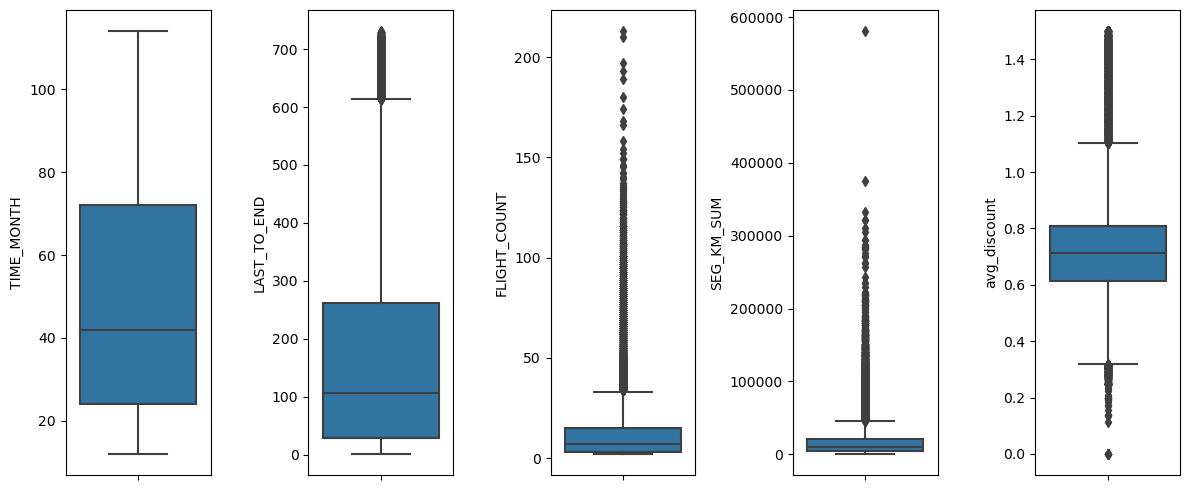

In [38]:
#Checking outliers

column = airline_LRFMC.columns
plt.figure(figsize=(12,5))
for i in range(len(column)):
    plt.subplot(1, len(column), i+1)
    sns.boxplot(y = airline_LRFMC[column[i]])
plt.tight_layout()
plt.show()


**Observation**

1. There are outliers in the Features `LAST_TO_END, FLIGHT_COUNT, SEG_KM_SUM, avg_discount`.
2. For handling outliers, the IQR (Interquartile Range) Method is used. The Inter Quartile Range (IQR) is one of the most widely used procedures for detecting and eliminating outliers.

**Procedure:**

- Find the first quartile, Q1.
- Find the third quartile, Q3.
- Calculate the IQR. IQR = Q3-Q1.
- Determine the range of normal data with the lower limit as Q1 - 1.5 * IQR and the upper limit as Q3 + 1.5 * IQR.

In [43]:
print(f'Number of rows before filtering outliers: {len(airline_LRFMC)}')
columns = airline_LRFMC.columns
array_filter = np.array([True] * len(airline_LRFMC))

for col in columns:
    Q1 = airline_LRFMC[col].quantile(0.25)
    Q3 = airline_LRFMC[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    # Update array_filter here
    array_filter = ((airline_LRFMC[col] >= low_limit) & (airline_LRFMC[col] <= high_limit)) & array_filter

airline_LRFMC = airline_LRFMC[array_filter].reset_index(drop=True)

print('Number of rows after filtering outliers:', len(airline_LRFMC))

Number of rows before filtering outliers: 61464
Number of rows after filtering outliers: 51650


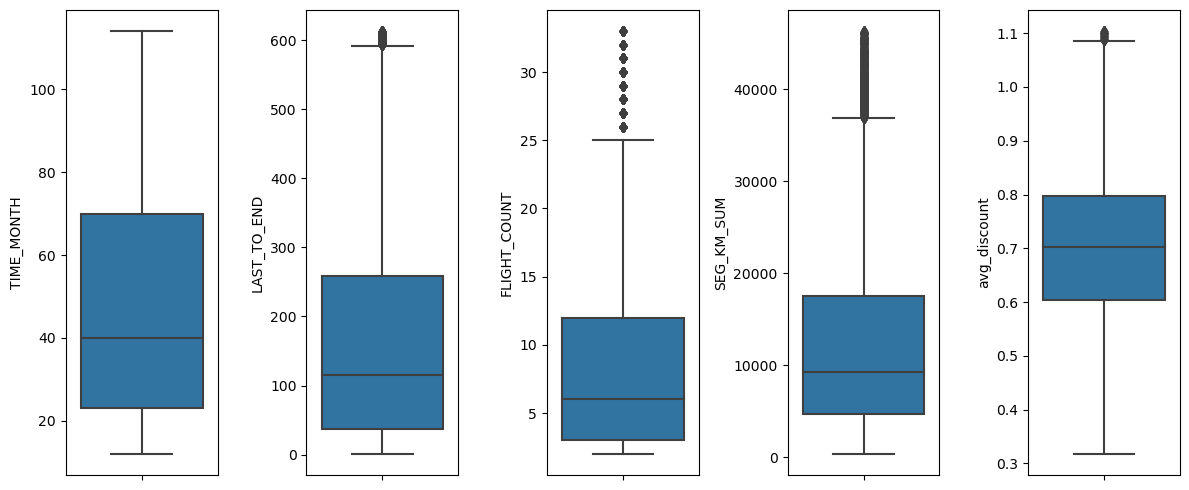

In [44]:
#Viewing outliers

column = airline_LRFMC.columns

plt.figure(figsize=(12,5))

for i in range(len(column)):
    plt.subplot(1, len(column), i+1)
    sns.boxplot(y = airline_LRFMC[column[i]])
plt.tight_layout()
plt.show()

**Observation**

The number of data points after performing outlier handling has become 51,650

## Feature Standarization

In [36]:
airline_LRFMC.describe()

,TIME_MONTH,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
count,51650.000000,51650.000000,51650.000000,51650.000000,51650.000000
mean,47.635779,170.095973,8.805402,12465.127938,0.699109
std,27.838047,161.808233,7.022319,9932.187396,0.144748
min,12.000000,1.000000,2.000000,368.000000,0.317624
25%,23.000000,37.000000,3.000000,4756.000000,0.603480
50%,40.000000,116.000000,6.000000,9294.500000,0.702044
75%,70.000000,259.000000,12.000000,17583.750000,0.796656
max,114.000000,613.000000,33.000000,46304.000000,1.103835


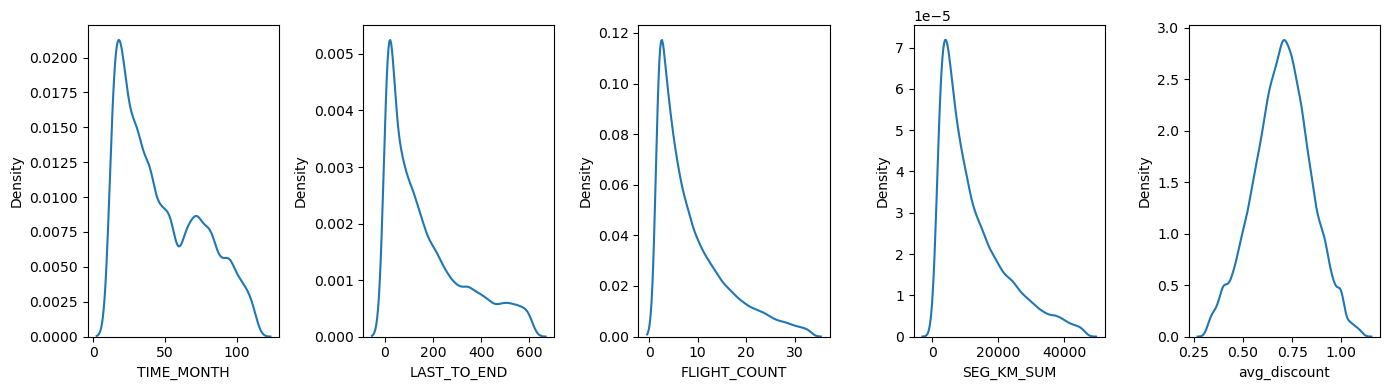

In [45]:
#Viewing the data distribution before standardization

fitur = ["TIME_MONTH","LAST_TO_END","FLIGHT_COUNT","SEG_KM_SUM","avg_discount"]

plt.figure(figsize=(14,4))
for i in range(len(fitur)):
    plt.subplot(1,5, i+1)
    sns.kdeplot(x = airline_LRFMC[fitur[i]])

plt.tight_layout()
plt.show()

**Observation**

It is observed that the values of each feature differ, therefore standardization will be performed first with the hope of making it easier for the model to learn and to have the data on the same scale.

In [46]:
#Change the feature names to ['L', 'R', 'F', 'M', 'C']
airline_LRFMC.columns = ["L","R","F","M","C"]

In [49]:
scaler = StandardScaler()
fitur = ["L","R","F","M","C"]

X = airline_LRFMC[fitur]
X_std = scaler.fit_transform(X)
airline_LRFMC_final = pd.DataFrame(data = X_std, columns = fitur)
airline_LRFMC_final.head()

,L,R,F,M,C
0,1.198523,-0.952346,2.733397,3.391720,2.759259
1,1.521825,-0.952346,2.875801,3.153905,2.766620
2,0.875221,-0.383766,-0.114693,3.336545,2.373702
3,-0.130606,-1.007968,2.875801,3.178371,2.488459
4,1.090756,1.643344,-0.399502,3.322047,2.214945


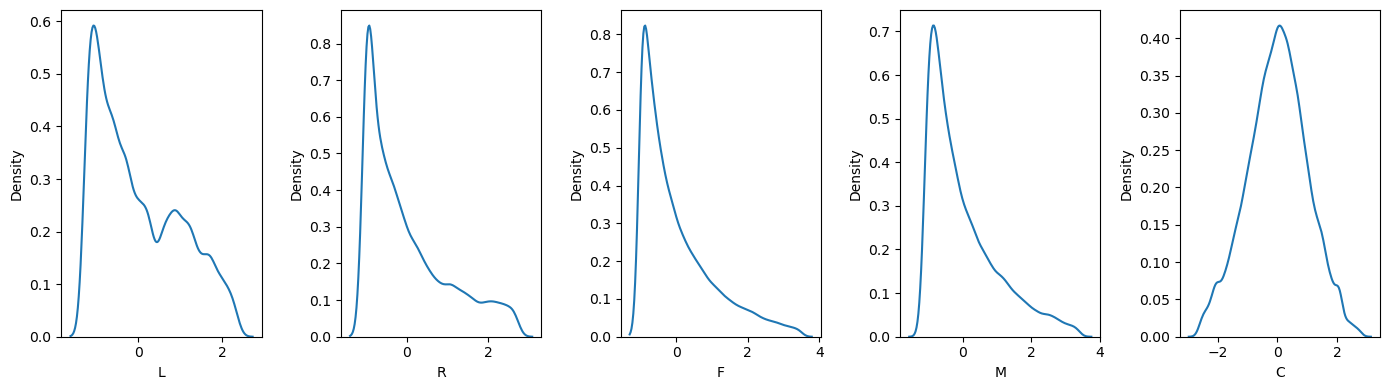

In [50]:
#Viewing the distribution of data that has been standardized

fitur = ["L","R","F","M","C"]

plt.figure(figsize=(14,4))
for i in range(len(fitur)):
    plt.subplot(1,5, i+1)
    sns.kdeplot(x = airline_LRFMC_final[fitur[i]])

plt.tight_layout()
plt.show()

In [51]:
airline_LRFMC_final.describe()

,L,R,F,M,C
count,5.165000e+04,5.165000e+04,51650.000000,5.165000e+04,5.165000e+04
mean,-1.540770e-17,1.320660e-17,0.000000,-1.760880e-17,-1.452726e-16
std,1.000010e+00,1.000010e+00,1.000010,1.000010e+00,1.000010e+00
min,-1.280123e+00,-1.045049e+00,-0.969120,-1.217984e+00,-2.635541e+00
25%,-8.849765e-01,-8.225617e-01,-0.826715,-7.761838e-01,-6.606642e-01
50%,-2.742956e-01,-3.343247e-01,-0.399502,-3.192306e-01,2.027402e-02
75%,8.033766e-01,5.494460e-01,0.454925,5.153620e-01,6.739193e-01
max,2.383963e+00,2.737242e+00,3.445419,3.407024e+00,2.796107e+00


**Observation**

1. The data has been standardized to the same scale.
2. The data distribution appears to be right-skewed, which means the distribution tends to be positively skewed (Mean > Median).

# Modeling


For segmentation in this case, the **K-Means Clustering** method is being used. Before determining the optimal number of clusters, an analysis of the n-clusters will be conducted using both the **Elbow Method** and the **Silhouette Method**. 

- The **Elbow Method** involves plotting the explained variance against the number of clusters, and the "elbow" of the curve indicates the optimal number of clusters.
- The **Silhouette Method** measures how similar an object is to its own cluster compared to other clusters. The silhouette score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. The optimal number of clusters will have a high average silhouette score.

## Elbow Method

In [53]:
from sklearn.cluster import KMeans
#import numpy as np
list_inertia = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=0)
    kmeans.fit(airline_LRFMC_final.values)
    inertia_values = kmeans.inertia_
    list_inertia.append((i, inertia_values))

# Print a summary after the loop
for i, inertia in list_inertia:
    print(f"Cluster: {i}, Inertia Value = {inertia}")

Cluster: 2, Inertia Value = 180630.61944525468
Cluster: 3, Inertia Value = 148947.59647518492
Cluster: 4, Inertia Value = 125423.18340699468
Cluster: 5, Inertia Value = 109987.39855843686
Cluster: 6, Inertia Value = 100144.6171606726
Cluster: 7, Inertia Value = 92451.38158116161
Cluster: 8, Inertia Value = 85983.89240053459
Cluster: 9, Inertia Value = 80282.70943465314
Cluster: 10, Inertia Value = 75882.5094154026


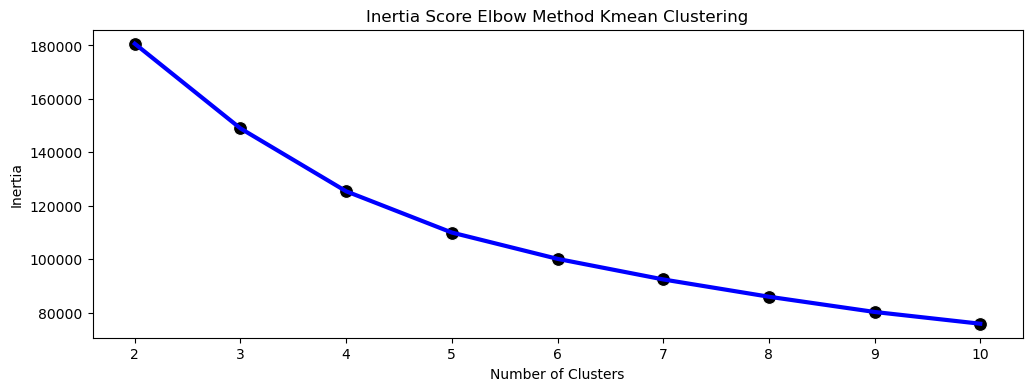

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

cluster_numbers = [i[0] for i in list_inertia]  # Extract cluster numbers
inertia_values = [i[1] for i in list_inertia]   # Extract inertia values

fig, ax = plt.subplots(figsize=(12,4))
sns.lineplot(x=cluster_numbers, y=inertia_values, color="blue", linewidth=3)
sns.scatterplot(x=cluster_numbers, y=inertia_values, s=100, color='black')
plt.title("Inertia Score Elbow Method Kmean Clustering")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.xticks(range(2, 11))  # Ensure x-ticks for each cluster number
plt.show()


**Observation**

The simulation using the **Elbow Method** does not clearly show a distinct elbow or drop point between 4 and 6 clusters. Therefore, let's use the **Yellowbrick** library for assistance and visualizing it using the **KElbowVisualizer**.

Utilizing **KElbowVisualizer** from the Yellowbrick library can offer a clearer and more precise graphical representation of the Elbow Method. This approach aids in more accurately identifying the optimal number of clusters by visually depicting the point where the rate of decrease in inertia (within-cluster sum-of-squares) sharply changes. This can be particularly useful in cases where the elbow is not very pronounced in a standard plot. The Yellowbrick library's visualizer enhances the decision-making process by providing a more user-friendly and interpretable visualization.

In [59]:
#install yellowbrick
!pip install yellowbrick >nul 2>&1

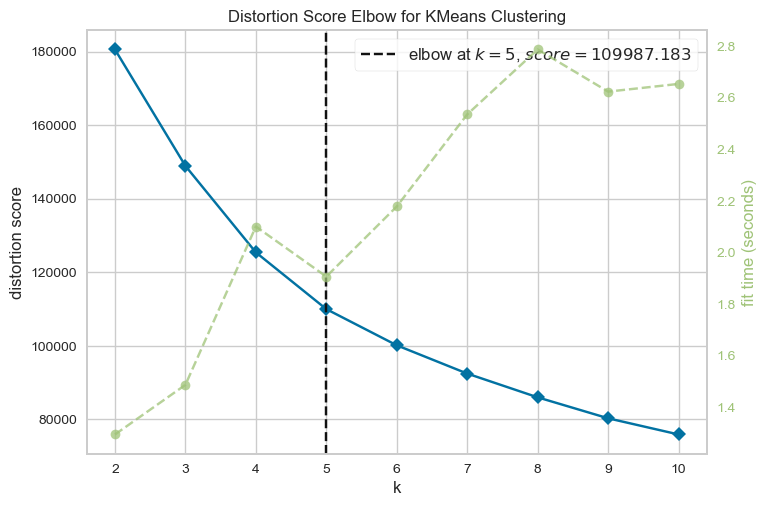

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [61]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Set n_init explicitly to suppress the FutureWarning
model = KMeans(random_state=123, n_init=10)  # Assuming the future version changes n_init to 'auto', setting it to 10
visualizer = KElbowVisualizer(model, k=(2,11), metric='distortion', timings=True, locate_elbow=True)
visualizer.fit(airline_LRFMC_std.values)       
visualizer.show() 

**Observation**

It is observed that when using the **KElbowVisualizer**, the optimal number of clusters appears to be 5. For comparison, let's conduct a simulation using the **Silhouette Method**. 

The **Silhouette Method** will provide a different perspective on the optimal cluster number by evaluating how similar each point in a cluster is to points in its neighboring clusters. This method can help validate the findings from the Elbow Method and ensure a robust choice of the number of clusters for the K-Means algorithm.

## Silhoutte Method

In [63]:
from sklearn.metrics import silhouette_score
list_silhoutte_score = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(airline_LRFMC_final)
    pred = kmeans.predict(airline_LRFMC_final)
    
    score_euclidean = silhouette_score(airline_LRFMC_final, pred, metric='euclidean')
    list_silhoutte_score.append(score_euclidean)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\clust

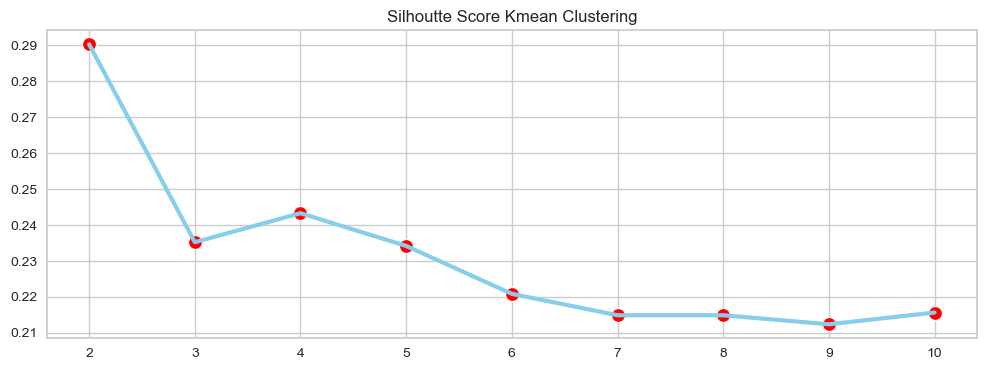

In [64]:
fig, ax = plt.subplots(figsize=(12,4))
sns.lineplot(x=range(2, 11), y=list_silhoutte_score, color="skyblue", linewidth = 3)
sns.scatterplot(x=range(2, 11), y=list_silhoutte_score, s=100, color='red')
plt.title("Silhoutte Score Kmean Clustering")

plt.show()

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


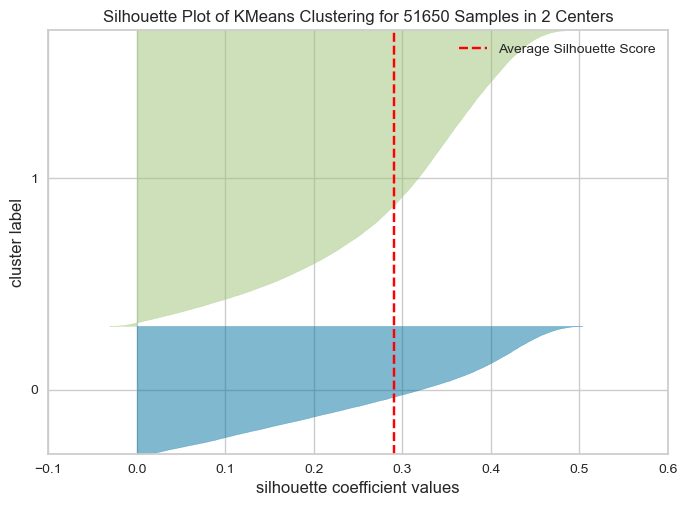

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


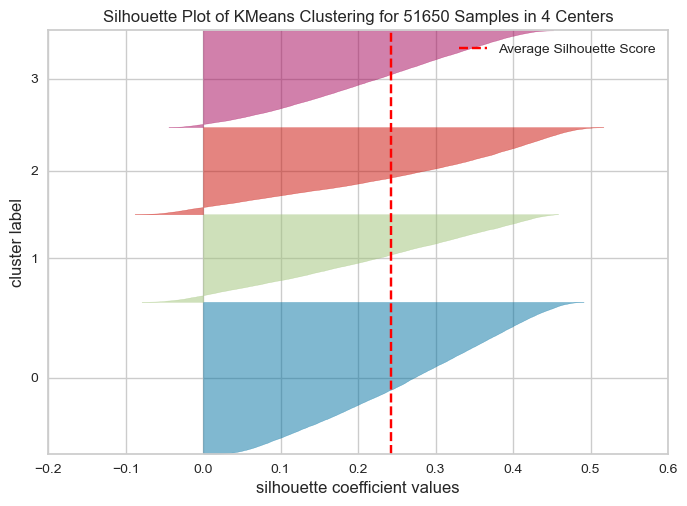

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


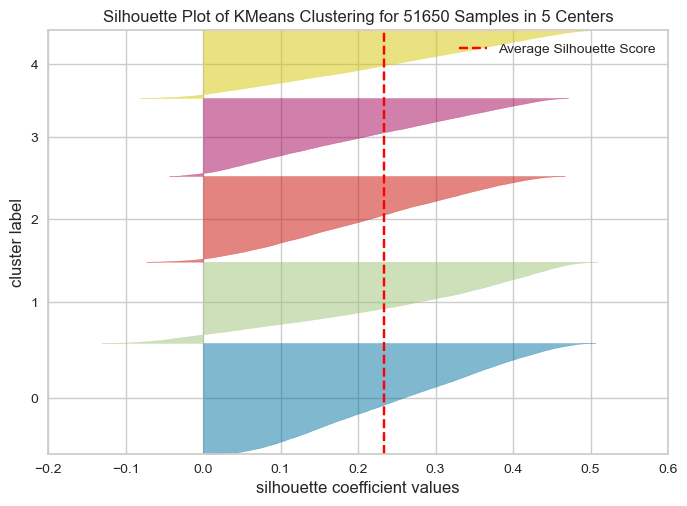

In [68]:
from yellowbrick.cluster import SilhouetteVisualizer

for i in [2,4,5]:
    model = KMeans(i, random_state=123)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(airline_LRFMC_final)        
    visualizer.show()

**Results of Observation from Elbow and Silhouette Method**

From the simulation using the **Silhouette Method**, it appears that the optimal number of clusters is at 2 and 4, as they have the highest average values compared to others. However, the **Elbow Method** suggests that the optimal number of clusters is 5. Therefore, let's conduct a comparison of clusters at 2, 4, and 5 to determine the most optimal clustering.

This approach of comparing results from both the Elbow and Silhouette methods is a comprehensive strategy to identify the most suitable number of clusters for K-Means clustering. It combines the Elbow Method's focus on minimizing within-cluster variance (inertia) with the Silhouette Method's emphasis on maximizing separation between clusters. This dual approach ensures a more robust and informed decision regarding the optimal number of clusters.

# Evaluation and Visualization using  PCA

For evaluation and visualization, PCA is used here because there are 5 features or 5 dimensions to facilitate the visualization of each cluster.

## Simulation using 2 Clusters

In [70]:
#airline_LRFMC_final = airline_LRFMC_final.drop("cluster", axis = 1)
#Simulating with 2 clusters
from sklearn.cluster import KMeans
kmeans_2 = KMeans(n_clusters=2, random_state=0)
kmeans_2.fit(airline_LRFMC_final.values)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [71]:
airline_LRFMC_final['cluster'] = kmeans_2.labels_

In [72]:
airline_LRFMC_final.head(3)

,L,R,F,M,C,cluster
0,1.198523,-0.952346,2.733397,3.391720,2.759259,1
1,1.521825,-0.952346,2.875801,3.153905,2.766620,1
2,0.875221,-0.383766,-0.114693,3.336545,2.373702,1


In [73]:
display(airline_LRFMC_final.groupby('cluster').agg(['median','mean']))

L                   R                   F                   M  \
           median      mean    median      mean    median      mean    median   
cluster                                                                         
0       -0.382063 -0.108027  0.024128  0.278388 -0.684311 -0.532066 -0.625460   
1        0.084928  0.248656 -0.810201 -0.640792  1.024543  1.224709  1.062301   

                          C            
             mean    median      mean  
cluster                                
0       -0.527450 -0.016874 -0.049131  
1        1.214083  0.095772  0.113090

It's evident that each cluster has different LRFMC values from one another

In [74]:
pca = PCA(n_components=2)

pca.fit(airline_LRFMC_final)
pcs = pca.transform(airline_LRFMC_final)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters_2'] = airline_LRFMC_final['cluster']
data_pca.head()

,PC 1,PC 2,clusters_2
0,4.632748,2.500789,1
1,4.630230,2.671557,1
2,2.550965,2.141763,1
3,4.383275,1.660509,1
4,1.541553,2.520241,1


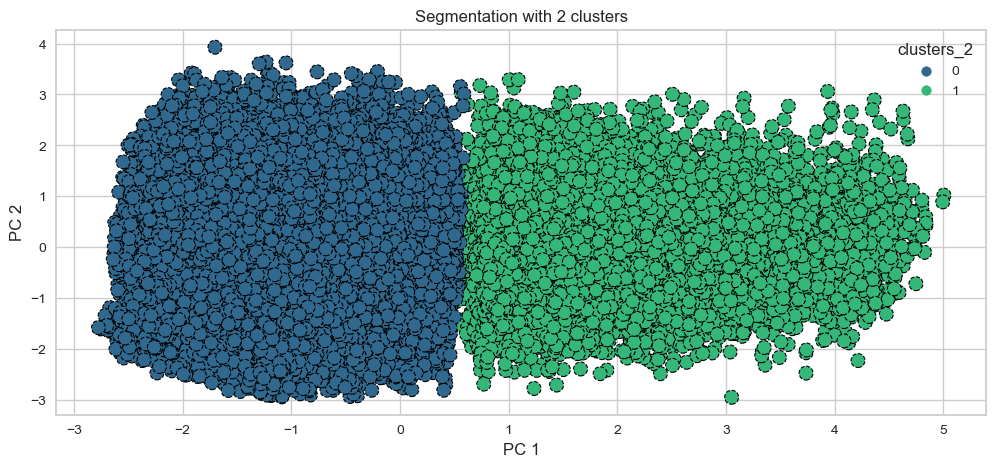

In [75]:
fig, ax = plt.subplots(figsize=(12,5))

sns.scatterplot( x="PC 1", y="PC 2", hue="clusters_2",data=data_pca, edgecolor='black', linestyle='--', s = 100,
                palette='viridis', ax=ax)
plt.title("Segmentation with 2 clusters")
plt.show()

The observation from the 2-cluster segmentation is as follows:

1. Each cluster has different LRFMC values.
2. In the segmentation using 2 clusters, Cluster 0 and Cluster 1 are still somewhat overlapping, but the clusters are reasonably separated.

## Simulation using 4 clusters

In [76]:
from sklearn.cluster import KMeans
airline_LRFMC_final = airline_LRFMC_final.drop("cluster", axis = 1)
kmeans_4 = KMeans(n_clusters=4, random_state=0)
kmeans_4.fit(airline_LRFMC_final.values)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [77]:
airline_LRFMC_final['cluster'] = kmeans_4.labels_

In [78]:
airline_LRFMC_final.head(3)

,L,R,F,M,C,cluster
0,1.198523,-0.952346,2.733397,3.391720,2.759259,1
1,1.521825,-0.952346,2.875801,3.153905,2.766620,1
2,0.875221,-0.383766,-0.114693,3.336545,2.373702,1


In [79]:
display(airline_LRFMC_final.groupby('cluster').agg(['median','mean']))

L                   R                   F                   M  \
           median      mean    median      mean    median      mean    median   
cluster                                                                         
0       -0.561675 -0.325263  1.581542  1.614001 -0.826715 -0.697152 -0.795314   
1        0.049006  0.195987 -0.834922 -0.660022  1.451757  1.590376  1.457183   
2       -0.777209 -0.692091 -0.464109 -0.385149 -0.399502 -0.320229 -0.421274   
3        1.162601  1.206872 -0.377586 -0.259566 -0.399502 -0.295552 -0.394693   

                          C            
             mean    median      mean  
cluster                                
0       -0.663064  0.160635  0.097926  
1        1.558225  0.121299  0.148828  
2       -0.321037 -0.132360 -0.169153  
3       -0.296192  0.060748  0.043871

It can be seen that in cluster 2 and 3, the column F (Frequency) has the same value, while the other features have different values.

In [80]:
pca = PCA(n_components=2)

pca.fit(airline_LRFMC_final)
pcs = pca.transform(airline_LRFMC_final)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters_4'] = airline_LRFMC_final['cluster']
data_pca.head()

,PC 1,PC 2,clusters_4
0,4.187710,2.249171,1
1,4.210527,2.108702,1
2,2.152164,1.481576,1
3,3.863407,2.610646,1
4,0.996602,1.891464,1


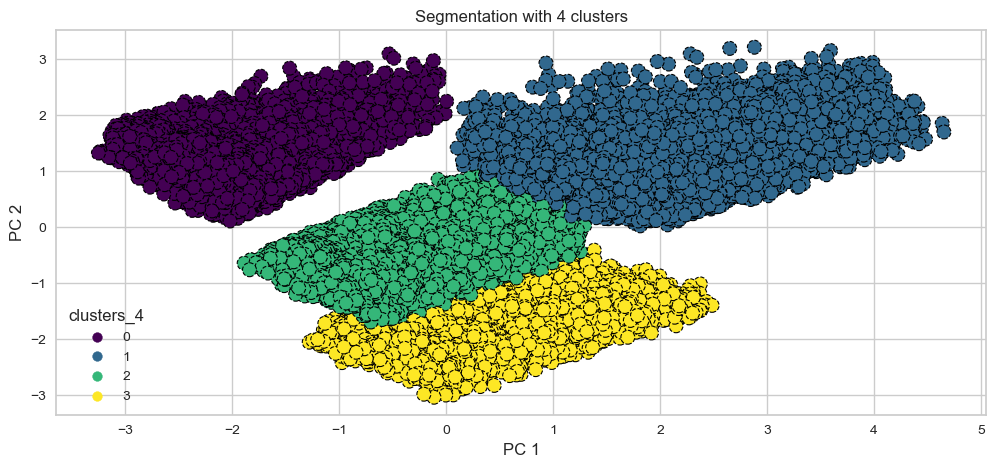

In [81]:
fig, ax = plt.subplots(figsize=(12,5))

sns.scatterplot( x="PC 1", y="PC 2", hue="clusters_4", data=data_pca, edgecolor='black', linestyle='--',
                palette='viridis', ax=ax, s = 100)
plt.title("Segmentation with 4 clusters")
plt.show()

Observation Results for 4 Clusters:

In clusters 2 and 3, the column F (Frequency) has the same value, while the other features have different values. It can be observed that in the segmentation using 4 clusters, clusters 2 and 3 are still close to each other, but the clusters are reasonably well separated. There is some overlap in cluster 2 due to the identical values for Frequency.

## Simulation using 5 Clusters

In [82]:
from sklearn.cluster import KMeans
airline_LRFMC_final = airline_LRFMC_final.drop("cluster", axis = 1)
kmeans_5 = KMeans(n_clusters=5, random_state=0)
kmeans_5.fit(airline_LRFMC_final.values)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [83]:
airline_LRFMC_final['cluster'] = kmeans_5.labels_

In [84]:
airline_LRFMC_final.head(3)

,L,R,F,M,C,cluster
0,1.198523,-0.952346,2.733397,3.391720,2.759259,0
1,1.521825,-0.952346,2.875801,3.153905,2.766620,0
2,0.875221,-0.383766,-0.114693,3.336545,2.373702,0


In [85]:
display(airline_LRFMC_final.groupby('cluster').agg(['median','mean']))

L                   R                   F                   M  \
           median      mean    median      mean    median      mean    median   
cluster                                                                         
0        0.049006  0.198349 -0.841102 -0.671007  1.594161  1.643498  1.517593   
1       -0.741287 -0.653589 -0.525911 -0.417512 -0.257097 -0.193154 -0.313643   
2       -0.669442 -0.494734 -0.031494  0.122090 -0.684311 -0.578839 -0.655464   
3       -0.453908 -0.230674  1.723687  1.719374 -0.826715 -0.688743 -0.796925   
4        1.234446  1.287964 -0.420848 -0.293803 -0.399502 -0.236614 -0.323208   

                          C            
             mean    median      mean  
cluster                                
0        1.620463  0.066936  0.096427  
1       -0.236854  0.385318  0.479316  
2       -0.516910 -1.234111 -1.297729  
3       -0.662088  0.422358  0.484345  
4       -0.235754  0.059346  0.087943

It can be observed that each cluster has different LRFMC values

In [86]:
pca = PCA(n_components=2)

pca.fit(airline_LRFMC_final)
pcs = pca.transform(airline_LRFMC_final)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters_5'] = airline_LRFMC_final['cluster']
data_pca.head()

,PC 1,PC 2,clusters_5
0,4.330359,2.610127,0
1,4.253265,2.820028,0
2,2.865614,1.224378,0
3,4.459207,1.595665,0
4,2.068840,0.768552,0


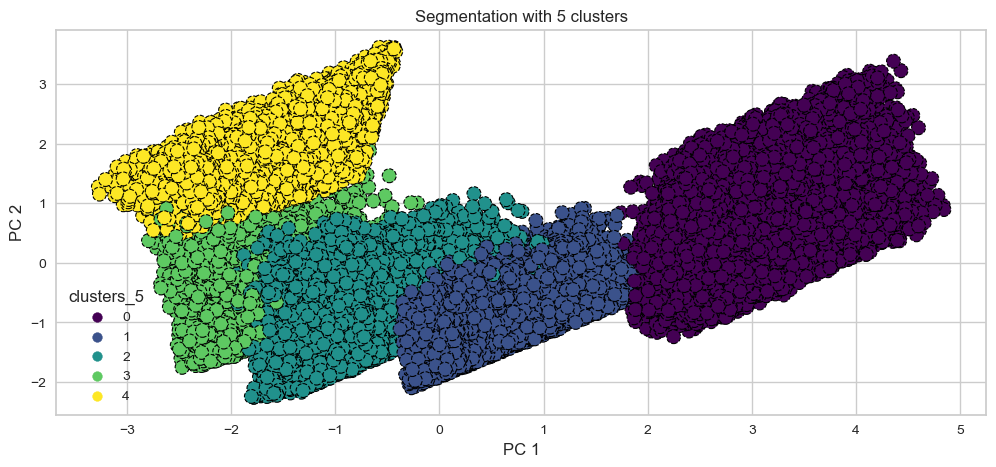

In [87]:
fig, ax = plt.subplots(figsize=(12,5))

sns.scatterplot( x="PC 1", y="PC 2", hue="clusters_5", data=data_pca, edgecolor='black', linestyle='--', s =100,
                palette='viridis', ax=ax)
plt.title("Segmentation with 5 clusters")
plt.show()

The observation for 5 clusters is as follows:

1. Each cluster has different LRFMC values.
2. The segmentation using 5 clusters shows that the clusters are well separated with only a slight overlap between them.

## Evaluation Results

Based on the comparison between 2, 4, and 5 clusters, I have decided to use 5 clusters. This decision is made because the **LRFMC** values in each cluster are different, and there is only a slight overlap compared to using 4 clusters, where there are identical **Frequency** values in clusters 2 and 3. Additionally, using 2 clusters provides too little information for segmentation.

# Insight

In [88]:
#Adding clusters to the airline_LRFMC dataframe
airline_LRFMC['cluster'] = kmeans_5.labels_
display(airline_LRFMC.groupby('cluster').agg(['median','mean']))

L                 R                  F                   M  \
        median       mean median        mean median       mean   median   
cluster                                                                   
0         49.0  53.157379   34.0   61.522512   20.0  20.346457  27538.0   
1         27.0  29.441327   85.0  102.539720    7.0   7.449026   9350.0   
2         29.0  33.863493  165.0  189.850883    4.0   4.740647   5955.0   
3         35.0  41.214338  449.0  448.302131    3.0   3.968879   4550.0   
4         82.0  83.489821  102.0  122.556724    6.0   7.143840   9255.0   

                              C            
                 mean    median      mean  
cluster                                    
0        28559.715122  0.708798  0.713067  
1        10112.676316  0.754882  0.768488  
2         7331.135246  0.520476  0.511268  
3         5889.210826  0.760244  0.769216  
4        10123.598872  0.707699  0.711838

### Number of customers based on clusters

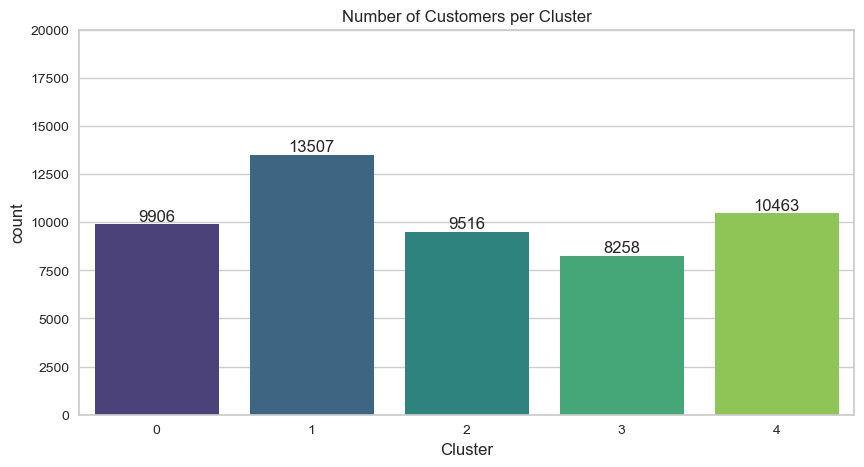

In [89]:
#Viewing the number of customers in each cluster

plt.figure(figsize=(10,5))
ax = sns.countplot(data= airline_LRFMC, x = "cluster", palette="viridis")
ax.bar_label(ax.containers[0])
plt.ylim(0,20000)
plt.title("Number of Customers per Cluster")
plt.xlabel("Cluster")
plt.show()

**Observation**

It can be observed that customers dominate in Cluster 1 and Cluster 4.

### Values of LRFMC in each Cluster

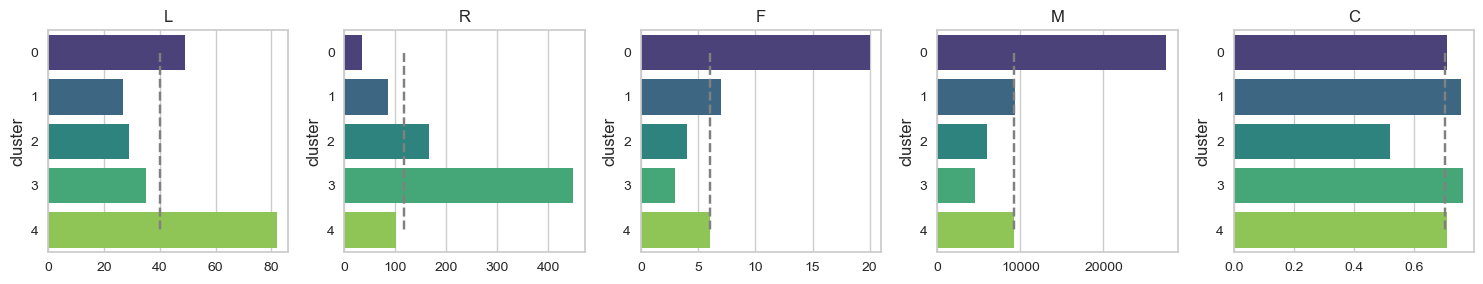

In [90]:
#Viewing the LRFMC values in each cluster.
column = ["L","R","F","M","C"]

plt.figure(figsize=(15,3))
for i in range(len(column)):
    plt.subplot(1, len(column), i+1)
    plt.vlines(airline_LRFMC[column[i]].median(), ymin=0, ymax=4, color='grey', linestyle='--')
    group = airline_LRFMC.groupby('cluster')
    index = group[column[i]].median().index
    value = group[column[i]].median().values
    sns.barplot(y = index, x = value, orient='h', palette='viridis')
    plt.title(column[i])

plt.tight_layout()
plt.show()

### Observation Results

It can be seen that each cluster is formed due to differences in the **LRFMC** model indicators. Based on the analysis and visualization above, it can be concluded that:

- **Cluster 0 - (The Champions)**:
  Customers who have been members for a medium period and frequently take long-distance flights, as indicated by their low Recency and high Frequency and Monetary values.

- **Cluster 1 - (Recent Users - Potential Loyalist)**:
  Customers who have recently become members and have already taken relatively long-distance flights, as indicated by their low Recency and relatively high Frequency and Monetary values.

- **Cluster 2 - (Need Attention)**:
  Customers who have recently become members and infrequently take flights, typically with short distances, as indicated by their high Recency, low Frequency, low Monetary, and low Discount (C) values.

- **Cluster 3 - (Hibernating)**:
  Customers who have been members for a medium period but rarely take flights. When they do, it's typically for short-distance flights and when there are discount vouchers available. This is evident from their high Recency and Discount (C) values, while Frequency and Monetary values are the lowest.

- **Cluster 4 - (Loyal Customers)**:
  Customers who have been members for a long time and take flights within a medium timeframe, typically with relatively short distances. This is evident from their very high Length value, while Frequency and Monetary values are relatively low.

### Business Recommendations

- **Cluster 0 - (The Champions) and Cluster 4 - (Loyal Customers)**:
  - Express gratitude to each customer for choosing the airline and provide customer greetings.
  - Offer vouchers or discounts for their next flights as a token of appreciation.
  - Implement a loyalty points system where customers earn points for each airline booking that can be redeemed for discount vouchers or affiliated airline products.
  - Provide special merchandise and services to these loyal customers as a sign of recognition and appreciation.

- **Cluster 1 - (Recent Users - Potential Loyalist)**:
  - Build and maintain good relationships with customers in this cluster.
  - Encourage them to refer friends to the airline by offering discounts for referrals.
  - Offer discounts for their next flights to encourage repeat bookings.
  - Implement a loyalty points system similar to Cluster 0 and 4, where customers can accumulate points for future benefits.

- **Cluster 2 - (Need Attention)**:
  - Initiate flyer campaigns or provide information about flight promotions to attract the attention of these customers.
  - Send newsletters to inform customers about discounts and upcoming flight programs, with the hope of encouraging them to choose the airline again.

- **Cluster 3 - (Hibernating)**:
  - Launch flyer campaigns or provide information about flight promotions to re-engage these customers.
  - Offer special promotions or time-limited flight programs to motivate them to make bookings with the airline again.
  
These recommendations aim to enhance customer satisfaction, increase customer loyalty, and ultimately improve the airline's business performance.

MEMBER_NO : ID Member

FFP_DATE : Frequent Flyer Program Join Date

FIRST_FLIGHT_DATE : Data of First Flight

GENDER : Gender of customer

FFP_TIER : Tier of frequent flyer program

WORK_CITY : City of Origin

WORK_PROVINCE : Province of Origin

WORK_COUNTRY : Country of Origin

AGE : Age of Customer

LOAD_TIME : Date the data was collected

FLIGHT_COUNT : Number of customer flights

BP_SUM : Itinerary

SUM_YR_1 : Total credits/points in the first year

SUM_YR_2 : Total credits/points in the second year

SEG_KM_SUM : Total distance (km) of flights already taken

LAST_FLIGHT_DATE : Last flight date

LAST_TO_END : Time distance of the last flight to the most recent flight order

AVG_INTERVAL : Average distance time

MAX_INTERVAL : Maximum distance time

EXCHANGE_COUNT : Number of exchanges

avg_discount : Average discount that customers get

Points_Sum : Number of points earned by the customers

Point_NotFlight : Points that are not used by customers

Modelling Method : Kmeans Clustering using LRFMC Model